#Power-law degree distributions

A degree distribution of a network follows a power-law distribution if $\log {p_k} = -\alpha \log{k} + c$ for some $\alpha, c>0$. A log-log plot of $p_k$ against $k$ will appear linear. In this exercise you will generate a random network and examine its empirical degree distribution and decide if it follows a power law distribution. 

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

(1) Use networkx function $erdos\_renyi\_graph$ to generate a random network with $n=1000$ nodes and $p=1/1000$ (probability that an edge exists between any two nodes). Visualize the graph.

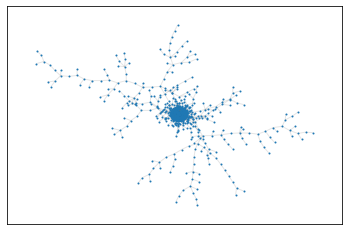

In [ ]:
#networkx random graph
G = nx.erdos_renyi_graph(n=1000, p=(1/1000) )

#Visualize the graph
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos,  node_size=1)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show()

(2) Using $.degree()$ method of the network object you created in (1), for each observed degree d obtain an empirical count of nodes with degree d. Normalize the counts and plot the relative frequencies against of each observed degree in a log-log plot.

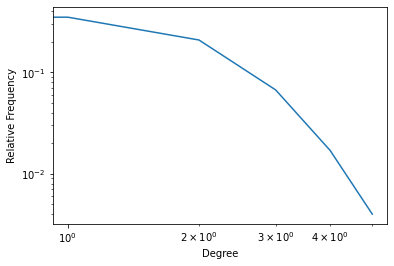

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
deg, counts = np.unique(degree_sequence, return_counts=True)

plt.plot(deg, counts/sum(counts))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Relative Frequency")

plt.show()

#Road Network Analysis

Install packages

In [ ]:
!pip install osmnx
!pip install matplotlib==3.1.3

     |████████████████████████████████| 93 kB 1.1 MB/s 
     |████████████████████████████████| 10.3 MB 48.7 MB/s 
     |████████████████████████████████| 994 kB 53.6 MB/s 
     |████████████████████████████████| 62 kB 818 kB/s 
     |████████████████████████████████| 6.3 MB 51.6 MB/s 
     |████████████████████████████████| 1.0 MB 42.0 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompat

     |████████████████████████████████| 13.1 MB 99 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import osmnx as ox
from IPython.display import Image
import networkx
import matplotlib.pyplot as plt
import numpy as np
import folium
%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.1'

Use osmnx to obtain a network representation of Paysandú's road network

In [22]:
G = ox.graph_from_place('Paysandu, Uruguay', simplify=True, network_type='drive')
G_projected = ox.project_graph(G)

Visualize the network

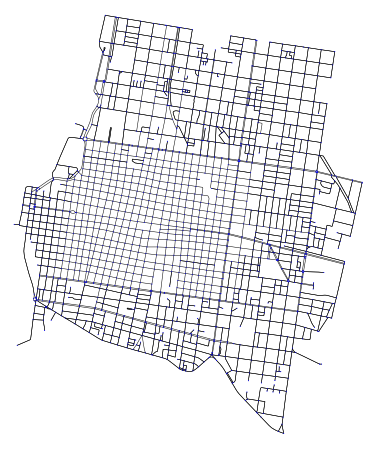

In [23]:
fig, ax = ox.plot_graph(G, bgcolor="white", node_color="blue",  node_size=1, edge_color="black", edge_linewidth=0.5, dpi=1000)

In [24]:
ox.plot_graph_folium(G, graph_map=None, popup_attribute=None, 
                      tiles='cartodbpositron', zoom=1, fit_bounds=True, 
                      edge_width=1, edge_opacity=1)

Output hidden; open in https://colab.research.google.com to view.

Calculate statistics on the netowrk such as betweeness centrality, eigenvalue centrality, closeness centrality etc

In [25]:
extended_stats = ox.extended_stats(G, bc=True, cc=True)
extended_stats.keys()

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:405: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


dict_keys(['avg_neighbor_degree', 'avg_neighbor_degree_avg', 'avg_weighted_neighbor_degree', 'avg_weighted_neighbor_degree_avg', 'degree_centrality', 'degree_centrality_avg', 'clustering_coefficient', 'clustering_coefficient_avg', 'clustering_coefficient_weighted', 'clustering_coefficient_weighted_avg', 'pagerank', 'pagerank_max_node', 'pagerank_max', 'pagerank_min_node', 'pagerank_min', 'closeness_centrality', 'closeness_centrality_avg', 'betweenness_centrality', 'betweenness_centrality_avg'])

Visualize **Betweenness Centrality**

In [20]:
centrality_values=[extended_stats['betweenness_centrality'][node] for node in G_projected.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color='r', node_alpha=0.05, bgcolor="w",  edge_color="black")

NameError: ignored

Visualize **Eigenvalue Centrality**

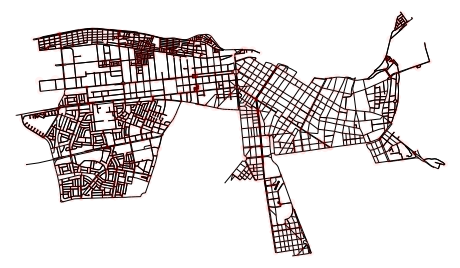

In [ ]:
centrality_values=[extended_stats['pagerank'][node] for node in G_projected.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color='r', node_alpha=0.05, bgcolor="w",  edge_color="black")

Visualize **Degree Centrality**

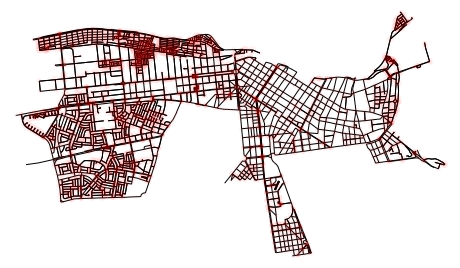

In [ ]:
centrality_values=[extended_stats['degree_centrality'][node] for node in G_projected.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color='r', node_alpha=0.05, bgcolor="w",  edge_color="black")

Visualize **Clustering Coefficient**

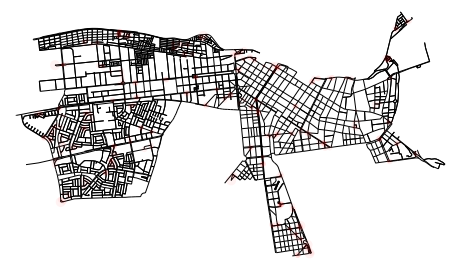

In [ ]:
centrality_values=[extended_stats['clustering_coefficient'][node] for node in G_projected.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color='r', node_alpha=0.05, bgcolor="w",  edge_color="black")

Visualize **Closeness Centrality**

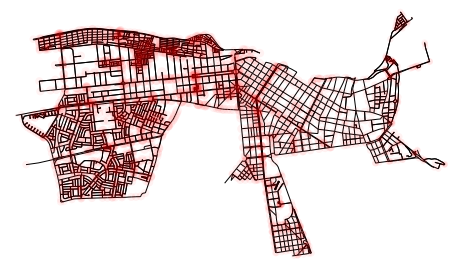

In [ ]:
centrality_values=[extended_stats['closeness_centrality'][node] for node in G_projected.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color='r', node_alpha=0.05, bgcolor="w",  edge_color="black")